La prueba f sirve para la significancia global del modelo
SEC: Suma explicada al cuadrado
SRC: Suma de Residuos al cuadrado
STC: Suma Total de cuadrados 

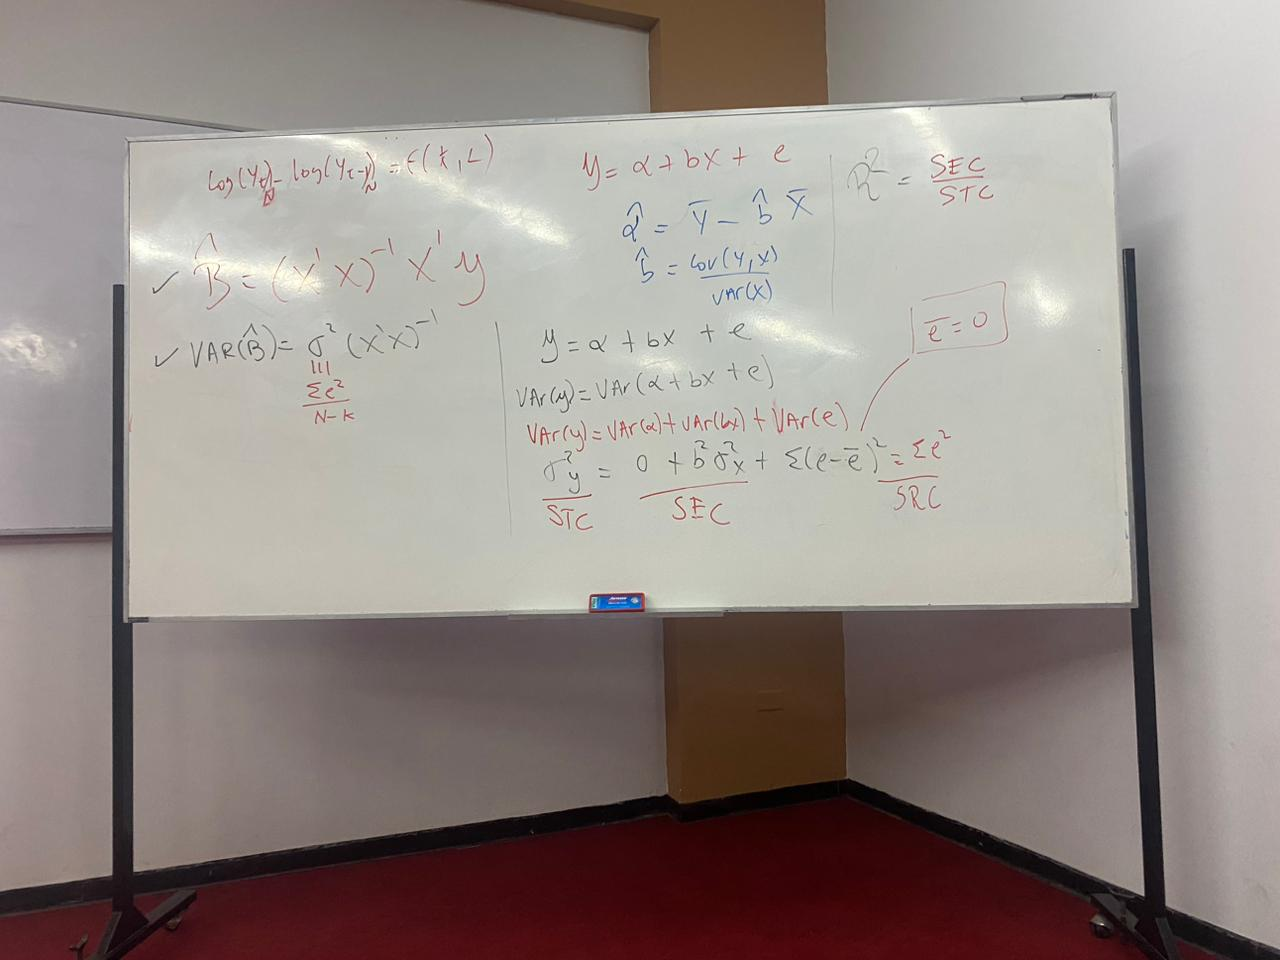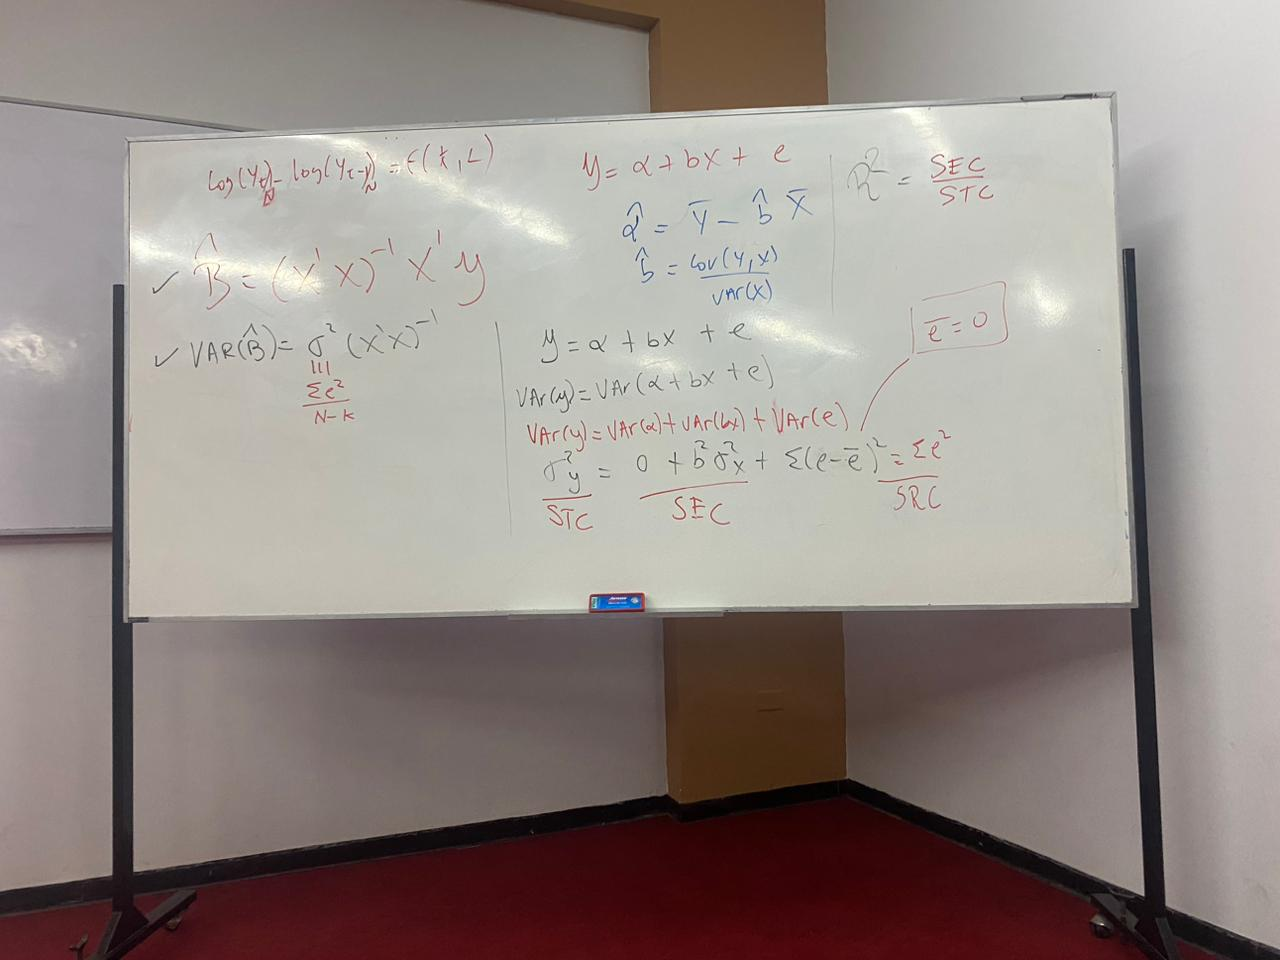

In [15]:
import sys
print(sys.executable)


C:\Users\ALUMNO\AppData\Local\Programs\Python\Python313\python.exe


In [16]:
import sys
!{sys.executable} -m pip install sympy

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)

   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:
import sympy as sp
print(sp.__version__)

1.14.0


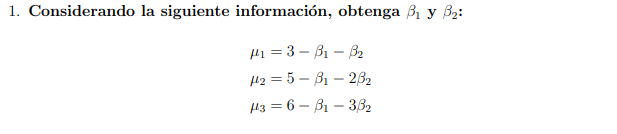

In [20]:
from sympy import *

# Definimos las variables simbólicas
B1 = Symbol('b1')
B2 = Symbol('b2')

# Definimos la suma de cuadrados
SB = (3 - B1 - B2)**2 + (5 - B1 - 2*B2)**2 + (6 - B1 - 3*B2)**2

# Derivadas parciales respecto a B1 y B2
e1 = diff(SB, B1)
e2 = diff(SB, B2)

# Resolviendo el sistema de ecuaciones
sol = solve([e1, e2], [B1, B2])
print(sol)


{b1: 5/3, b2: 3/2}


In [38]:
import numpy as np
Y=np.array([[3],[5],[6]])
#incluimos una columna de unos
X=np.array([[1,1],[1,2],[1,3]])
X

array([[1, 1],
       [1, 2],
       [1, 3]])

In [6]:
B=np.linalg.inv(X.T@X)@X.T@Y
print(B[0],B[1])#hallamos b1 y b2 

[1.66666667] [1.5]


In [7]:
#Preddicciones
print(Y)#vector de la variable dependiente
print(X@B)#predicciones de la variable dependiente
#la diferencia entre las preddiciones y el valor real de Y, es el error.
#En este caso 3.16666667 - 3, el error es = 0.16666667, para el primer elemento 

[[3]
 [5]
 [6]]
[[3.16666667]
 [4.66666667]
 [6.16666667]]


In [9]:
#Preddicciones, de otra forma 
P=X@np.linalg.inv(X.T@X)@X.T
print(P@Y)
#El resultado es el mismo

[[3.16666667]
 [4.66666667]
 [6.16666667]]


In [11]:
#la matriz de los residuos de un modelo
e=Y-X@B
e #Los resultados si se suman son 0

array([[-0.16666667],
       [ 0.33333333],
       [-0.16666667]])

In [13]:
#otra forma 
M1=np.eye(3)-P
print(M1@Y)

[[-0.16666667]
 [ 0.33333333]
 [-0.16666667]]


In [16]:
Mo=np.eye(3)-1/3*np.ones((3,1))@np.ones((3,1)).T #matriz hacedora de desvios
Mo

array([[ 0.66666667, -0.33333333, -0.33333333],
       [-0.33333333,  0.66666667, -0.33333333],
       [-0.33333333, -0.33333333,  0.66666667]])

In [17]:
#suma total de cuadrados, varianza de Y
STC=Y.T@Mo@Y
STC

array([[4.66666667]])

In [18]:
#suma explicada de cuadrados, varianza de Y
SEC=B.T@X.T@Mo@X@B
SEC

array([[4.5]])

In [20]:
#suma residual de cuadrados, varianza de Y
SRC=STC-SEC
SRC

array([[0.16666667]])

In [21]:
#Calculamos el Rcuadrado
R2=SEC/STC
R22=1-(SRC/STC)
print(R2,R22)
#que porcentaje de varianza esta explicado por el modelo, un r2 elevado sugiere anomalias 

[[0.96428571]] [[0.96428571]]


In [23]:
#Calculamos el Rcuadrado Ajustado
R2a=1-((1-R2)*(2/1))
R2a     

array([[0.92857143]])

In [26]:
#Prueba F
F1 = (R2 / 1) / ((1 - R2) / (3 - 2))
print(F1)
#Otra forma de hallarlo
F2=(SEC/1)/(SRC/(3-2))
print(F2)


[[27.]]
[[27.]]


In [32]:

import sys
!{sys.executable} -m pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.5 MB 11.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/38.5 MB 11.8 MB/s eta 0:00:03
   ------- -------------------------------- 7.1/38.5 MB 11.8 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/38.5 MB 11.8 MB/s eta 0:00:03
   ------------ --------------------------- 11.8/38.5 MB 11.8 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/38.5 MB 11.8 MB/s eta 0:00:03
   ----------------- ---------------------- 16.5/38.5 MB 11.8 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/38.5 MB 11.8 MB/s eta 0:00:02
   ---------------------- ----------------- 21.2/38.5 MB 11.8 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/38.5 MB 11.8 MB/s eta 0:00:02
   --------------------------- ------------ 26.2/38.5 MB 11.8 MB/s eta 0:00:02
   ----------------------------- ---------- 28.6/38.5 MB 11.8 MB/

In [35]:
#Hallar p value
from scipy.stats import f

In [36]:
print(f.sf(F2,1,1))
#No tengo suficiente evidencia estadistica para recahazar la hipotesis nula
#EL modelo no es estadisticamente significativo de manera global

[[0.12103772]]


In [40]:
#utilizamos la prueba de t student para saber si nuestros estimadores son signifativos 
s2=SRC #s2 es la variazna del error
varB=s2*np.linalg.inv(X.T@X)
varB
#array([[ 0.38888889, -0.16666667],  # (0,0) (1,1)
  #     [-0.16666667,  0.08333333]])

array([[ 0.38888889, -0.16666667],
       [-0.16666667,  0.08333333]])

In [41]:
t_cons=B[0]/(varB[0,0]**0.5)
t_b=B[1]/(varB[0,0]**0.5)
print(t_cons,t_b)
#ambos t criticos caen a la dereche del t critico 1.96, se rechaza la hipotesis nula
#Ho= el parametro es igual a 0
#H1= el parametro es diferente a 0
#Cada uno de los parametros tiene signifcancia global

[2.67261242] [2.40535118]


In [ ]:
#falta el pvaalue.......